In [1]:
# Team Members

# Pooja Goyal
# Roshan Sah
# Sanjib Paudel
# Sourabh Yadav

In [2]:
# Import all libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
from imblearn.over_sampling import SMOTE

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Conv1D,Flatten,MaxPool2D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import joblib

from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree

In [3]:
# Load data
data = pd.DataFrame(pd.read_csv('datasets/mc1.csv'))
print(data.shape)

(9466, 40)


In [4]:
data.head()

,id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,defects
0,1,0,1,0,0,0,0,1,1.00,0,...,2,0.50,2,3,2,3,2,0.00,0,False
1,2,0,1,0,0,0,0,1,1.00,0,...,2,1.00,2,3,2,3,1,0.00,0,False
2,3,0,1,1,0,0,0,1,1.00,0,...,3,0.50,3,6,3,6,2,0.00,0,False
3,4,8,17,11,32,3,12,13,0.16,6,...,32,0.14,75,137,37,25,93,42.17,80,False
4,5,4,7,1,1,8,12,4,0.17,6,...,18,0.11,52,61,13,10,38,28.13,24,False


In [5]:
# Check if any value is null
isAnyValueNull = data.isnull().values.any()
print('is Any Value Null:', isAnyValueNull)

is Any Value Null: False


In [6]:
# Pre-processing Data
if isAnyValueNull:
    data = data.dropna()
data_X = data.drop(['defects'], axis=1)
data_y = data['defects']
X_train1, X_test, y_train1, y_test = train_test_split(data_X, data_y, test_size = 0.1, random_state=1)

sm = SMOTE(random_state=1)
X_train2, y_train2 = sm.fit_sample(X_train1, y_train1)

X_train, X_val, y_train, y_val = train_test_split(X_train2, y_train2, test_size = .1, random_state=1)

combined_training_data = X_train.copy()
combined_training_data['defects'] = y_train

<AxesSubplot:>

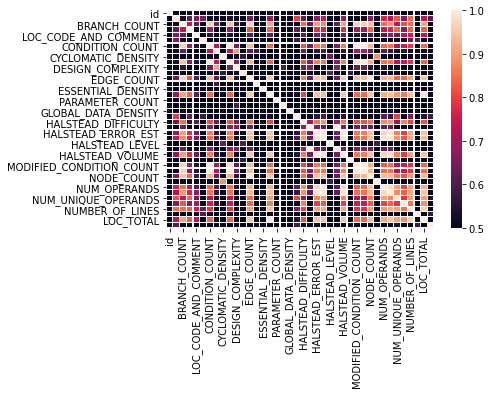

In [7]:
all_data = [data, data_X, data_y, combined_training_data, X_train1, X_train2, X_train, X_test, X_val, y_train1, y_train2, y_train, y_test, y_val]
# Heat map of pre processing data
corr = combined_training_data.corr()
sns.heatmap(corr, linewidths=0.1, vmin=0.5, vmax=1)

In [8]:
def plot_loss_accuracy_graph(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


In [9]:
# Predict Test Data
def predict_test_tata(model, X_val=X_val):
    # Predict the output of test data from trained model
    y_pred = model.predict(X_val)
    y_pred = (y_pred > 0.5)
    y_pred = pd.DataFrame(y_pred, columns=['defects'])
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)

    # Calculate the accuracy between actual output and predicted output
    return accuracy_score(y_val, y_pred)

Epoch 1/100
952/952 [==============================] - 1s 1ms/step - loss: 1.9439 - accuracy: 0.4880 - val_loss: 0.6930 - val_accuracy: 0.5142
Epoch 2/100
952/952 [==============================] - 1s 894us/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6933 - val_accuracy: 0.4858
Epoch 3/100
952/952 [==============================] - 1s 875us/step - loss: 0.6932 - accuracy: 0.4953 - val_loss: 0.6932 - val_accuracy: 0.4858
Epoch 4/100
952/952 [==============================] - 1s 873us/step - loss: 0.6932 - accuracy: 0.4944 - val_loss: 0.6933 - val_accuracy: 0.4858
Epoch 5/100
952/952 [==============================] - 1s 873us/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.5142
Epoch 6/100
952/952 [==============================] - 1s 874us/step - loss: 0.6931 - accuracy: 0.5042 - val_loss: 0.6935 - val_accuracy: 0.4858
Epoch 7/100
952/952 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6934 - val_accura

952/952 [==============================] - 1s 888us/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6934 - val_accuracy: 0.4858
Epoch 58/100
952/952 [==============================] - 1s 904us/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6933 - val_accuracy: 0.4858
Epoch 59/100
952/952 [==============================] - 1s 894us/step - loss: 0.6932 - accuracy: 0.4942 - val_loss: 0.6934 - val_accuracy: 0.4858
Epoch 60/100
952/952 [==============================] - 1s 892us/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6933 - val_accuracy: 0.4858
Epoch 61/100
952/952 [==============================] - 1s 873us/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6931 - val_accuracy: 0.5142
Epoch 62/100
952/952 [==============================] - 1s 926us/step - loss: 0.6932 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.4858
Epoch 63/100
952/952 [==============================] - 1s 906us/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy

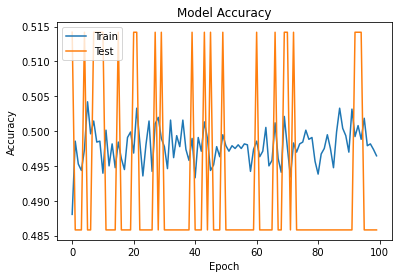

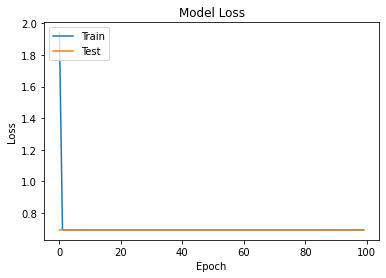

In [10]:
# model train
def neural_network():   
    model = Sequential()
    # First hidden layer
    model.add(Dense(units = 16, activation = 'relu', input_dim = len(data_X.columns)))
    # Second hidden layer
    model.add(Dense(units = 8, activation = 'relu'))
    # Third hidden layer
    model.add(Dense(units = 4, activation = 'relu'))
    # Output layer
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    
    # Compiling Artificial Neural Network
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    # Fitting the ANN to the Training set
    history = model.fit(X_train, y_train, batch_size = 16, epochs = 100, validation_data=(X_val, y_val))
    
    model.save(
        "trained/nn.h5",
        overwrite=True,
        include_optimizer=True,
        save_format=None,
        signatures=None,
        options=None,
        save_traces=True,
    )
    
    plot_loss_accuracy_graph(history)
    
neural_network()

In [11]:
# Predict test result of neural network
# Load saved model
model = keras.models.load_model("trained/nn.h5")
print('Test Accuracy or Neural Network', predict_test_tata(model))

Test Accuracy or Neural Network 0.4858156028368794


In [12]:
dotfile = six.StringIO()

def save_graph(model):
    for tree_in_forest in model.estimators_:
        export_graphviz(tree_in_forest,out_file='rf.dot',
        feature_names=data_X.columns,
        filled=True,
        rounded=True)
        (graph,) = pydot.graph_from_dot_file('rf.dot')
        graph.write_png('images/rf.png')

In [13]:
def random_forest():
    model = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=0)
    model.fit(X_train, y_train)
    joblib.dump(model, "trained/rf.h5")
    save_graph(model)

random_forest()

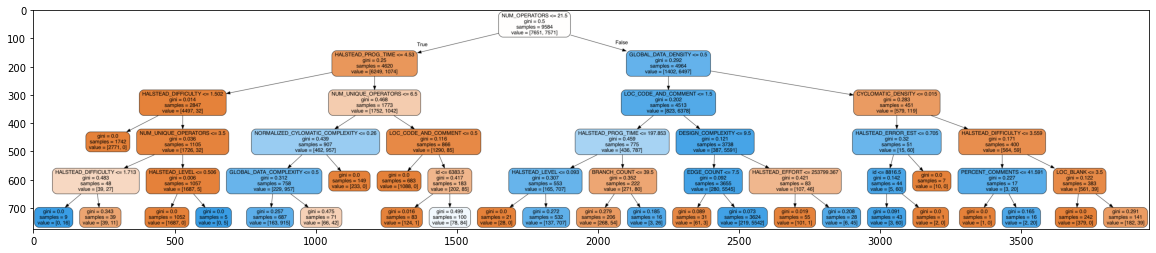

In [14]:
img = image.imread("images/rf.png")
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.show()

In [15]:
# Predict test result of random forest
model = joblib.load("trained/rf.h5")
print('Test Accuracy of Random Forest', predict_test_tata(model))

Test Accuracy of Random Forest 0.9633569739952719


In [16]:
def svm():
    model = SVC(gamma='auto')
    model.fit(X_train, y_train)
    joblib.dump(model, "trained/svm.h5")
svm()

In [17]:
# Predict test result of svc
model = joblib.load("trained/svm.h5")
print('Test Accuracy of SVC', predict_test_tata(model))

Test Accuracy of SVC 0.7446808510638298


Epoch 1/100
952/952 [==============================] - 2s 2ms/step - loss: 2.7318 - accuracy: 0.8478 - val_loss: 0.3513 - val_accuracy: 0.8741
Epoch 2/100
952/952 [==============================] - 2s 2ms/step - loss: 0.3414 - accuracy: 0.8951 - val_loss: 0.3367 - val_accuracy: 0.8747
Epoch 3/100
952/952 [==============================] - 2s 2ms/step - loss: 0.2722 - accuracy: 0.9088 - val_loss: 0.2254 - val_accuracy: 0.9267
Epoch 4/100
952/952 [==============================] - 2s 2ms/step - loss: 0.2180 - accuracy: 0.9261 - val_loss: 0.1820 - val_accuracy: 0.9486
Epoch 5/100
952/952 [==============================] - 1s 1ms/step - loss: 0.1877 - accuracy: 0.9369 - val_loss: 0.1633 - val_accuracy: 0.9539
Epoch 6/100
952/952 [==============================] - 1s 1ms/step - loss: 0.1698 - accuracy: 0.9446 - val_loss: 0.1644 - val_accuracy: 0.9509
Epoch 7/100
952/952 [==============================] - 1s 1ms/step - loss: 0.1590 - accuracy: 0.9484 - val_loss: 0.1470 - val_accuracy: 0.9563

Epoch 58/100
952/952 [==============================] - 1s 1ms/step - loss: 0.0243 - accuracy: 0.9930 - val_loss: 0.0482 - val_accuracy: 0.9917
Epoch 59/100
952/952 [==============================] - 1s 2ms/step - loss: 0.0266 - accuracy: 0.9923 - val_loss: 0.0430 - val_accuracy: 0.9923
Epoch 60/100
952/952 [==============================] - 1s 1ms/step - loss: 0.0247 - accuracy: 0.9931 - val_loss: 0.0519 - val_accuracy: 0.9905
Epoch 61/100
952/952 [==============================] - 1s 1ms/step - loss: 0.0228 - accuracy: 0.9932 - val_loss: 0.0441 - val_accuracy: 0.9876
Epoch 62/100
952/952 [==============================] - 1s 1ms/step - loss: 0.0242 - accuracy: 0.9928 - val_loss: 0.0486 - val_accuracy: 0.9900
Epoch 63/100
952/952 [==============================] - 1s 1ms/step - loss: 0.0249 - accuracy: 0.9923 - val_loss: 0.0507 - val_accuracy: 0.9840
Epoch 64/100
952/952 [==============================] - 1s 1ms/step - loss: 0.0239 - accuracy: 0.9938 - val_loss: 0.0465 - val_accuracy:

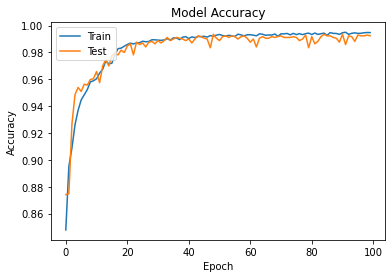

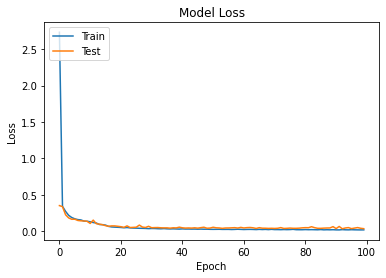

In [18]:
def cnn():
    global X_val1
    X_train_matrix = X_train.values
    X_val_matrix = X_val.values
    y_train_matrix = y_train.values
    y_val_matrix = y_val.values
    
    y_train_series = y_train
    y_val_series = y_val
    
    img_rows, img_cols = 1,len(data_X.columns)
    
    X_train1 = X_train_matrix.reshape(X_train_matrix.shape[0], img_rows, img_cols, 1)
    X_val1 = X_val_matrix.reshape(X_val_matrix.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    model = Sequential()
    # Model layers
    model.add(Conv2D(64, kernel_size=1, activation='relu',input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=1, activation='relu'))
    model.add(Conv2D(16, kernel_size=1, activation='relu'))
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model using accuracy to measure model performance
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #train the model
    history = model.fit(X_train1, y_train_matrix, batch_size=16, epochs=100, validation_data=(X_val1, y_val_matrix))
    
    model.save(
        "trained/cnn.h5",
        overwrite=True,
        include_optimizer=True,
        save_format=None,
        signatures=None,
        options=None,
        save_traces=True,
    )
    
    plot_loss_accuracy_graph(history)
    
cnn() 

In [19]:
# Predict test result of convolutional neural network
# Load saved model
model = keras.models.load_model("trained/cnn.h5")
print('Test Accuracy of CNN', predict_test_tata(model, X_val1))

Test Accuracy of CNN 0.9923167848699763


In [20]:
svm_model = joblib.load("trained/svm.h5")
rf_model = joblib.load("trained/rf.h5")
nn_model = keras.models.load_model("trained/nn.h5")
cnn_model = keras.models.load_model("trained/cnn.h5")

# print accuracy of svm, random forest, nn, cnn
def print_accuracy(model): 
    if (model == nn_model):
        y_pred_on_val = model.predict(X_val)>0.5
        y_pred_on_test = model.predict(X_test)>0.5
    elif (model == cnn_model):
        X_val_matrix = X_val.values
        X_val1 = X_val_matrix.reshape(X_val_matrix.shape[0], 1, len(X_val.columns), 1)
        y_pred_on_val = model.predict(X_val1)>0.5
        X_test_matrix = X_test.values
        X_test1 = X_test_matrix.reshape(X_test_matrix.shape[0], 1, len(X_test.columns), 1)
        y_pred_on_test = model.predict(X_test1)>0.5
    else:
        y_pred_on_val = model.predict(X_val)
        y_pred_on_test = model.predict(X_test)
        
    print('*****************', model, '*********************')   
    print('*****Validation Set*****')
    print('Accuracy:',balanced_accuracy_score(y_val,y_pred_on_val))
    print('Avg Precision:', average_precision_score(y_val,y_pred_on_val))
    print('Precision:', precision_score(y_val,y_pred_on_val))
    print('Recall:', recall_score(y_val, y_pred_on_val))
    print('************************')
    print('*****Test Set*****')
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
    print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
    print('Precision:', precision_score(y_test,y_pred_on_test))
    print('Recall:', recall_score(y_test, y_pred_on_test))
    print('************************')
    print('')
    y_pred_on_val_df = pd.DataFrame(y_pred_on_val, columns=['defects1'])
    y_pred_on_test_df = pd.DataFrame(y_pred_on_test, columns=['defects1'])
    val_result = pd.concat([y_val.reset_index(drop=True), y_pred_on_val_df['defects1']],axis=1)
    val_result = val_result.rename(columns={'defects':'val_actual', 'defects1':'val_predict'})
    test_result = pd.concat([y_test.reset_index(drop=True),y_pred_on_test_df['defects1']],axis=1)
    test_result = test_result.rename(columns={'defects':'test_actual','defects1':'test_predict'})
    return val_result, test_result


svm_val_result, svm_test_result = print_accuracy(svm_model)
rf_val_result, rf_test_result = print_accuracy(rf_model)
nn_val_result, nn_test_result = print_accuracy(nn_model)
cnn_val_result, cnn_test_result = print_accuracy(cnn_model)


new_val_set_X = pd.concat([svm_val_result['val_predict'],rf_val_result['val_predict'],nn_val_result['val_predict'],cnn_val_result['val_predict']],axis=1)
new_val_set_X_matrix = new_val_set_X.values
new_val_set_y_matrix = svm_val_result['val_actual'].values

new_test_set_X = pd.concat([svm_test_result['test_predict'],rf_test_result['test_predict'],nn_test_result['test_predict'],cnn_test_result['test_predict']],axis=1)
new_test_set_X_matrix = new_test_set_X.values
new_test_set_y_matrix = svm_test_result['test_actual'].values

***************** SVC(gamma='auto') *********************
*****Validation Set*****
Accuracy: 0.7516570182062254
Avg Precision: 0.7575957937401121
Precision: 0.995475113122172
Recall: 0.5057471264367817
************************
*****Test Set*****
Accuracy: 0.5
Avg Precision: 0.006335797254487857
Precision: 0.0
Recall: 0.0
************************

***************** RandomForestClassifier(max_depth=5, n_estimators=10, random_state=0) *********************
*****Validation Set*****
Accuracy: 0.9623542243476801
Avg Precision: 0.9343766426886825
Precision: 0.9353448275862069
Recall: 0.9977011494252873
************************
*****Test Set*****
Accuracy: 0.7902940134608571
Avg Precision: 0.03348448143777046
Precision: 0.047058823529411764
Recall: 0.6666666666666666
************************

***************** <keras.engine.sequential.Sequential object at 0x7fcb71384790> *********************
*****Validation Set*****
Accuracy: 0.5
Avg Precision: 0.5141843971631206
Precision: 0.0
Recall: 0.0
**

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***************** <keras.engine.sequential.Sequential object at 0x7fcb504a28e0> *********************
*****Validation Set*****
Accuracy: 0.9921260172833292
Avg Precision: 0.985836362093625
Precision: 0.9863791146424518
Recall: 0.9988505747126437
************************
*****Test Set*****
Accuracy: 0.6608218207580588
Avg Precision: 0.05550591611837652
Precision: 0.15384615384615385
Recall: 0.3333333333333333
************************



In [21]:
def ensemble_logistic_regression():
    model = LogisticRegression(random_state=0)
    model.fit(new_val_set_X_matrix, new_val_set_y_matrix)
    joblib.dump((model, new_test_set_X_matrix), "trained/ensemble.h5")
ensemble_logistic_regression()

In [22]:
ensemble = joblib.load("trained/ensemble.h5")
prediction = ensemble[0].predict(ensemble[1])
print('Ensemble Accuracy:',accuracy_score(y_test.values, prediction))

Ensemble Accuracy: 0.9841605068637803
